# Import

In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import calendar

# DataBase Connection

In [2]:
conn = psycopg2.connect(
    host='hp-dev-db-12sep.cgitnjqny0tw.ap-south-1.rds.amazonaws.com',
    port='5432',
    user='hp_read_user',
    password='hp_@_2023_321',
    database='postgres'
)

# Data Extraction

In [3]:
query1 = """select created::date as order_date,
	id as order_id,
    delivery_boy_id as delivery_boy_id,
    dispense_guy_id as dispense_guy_id,
    pharmacist_id as pharmacist_id
    from sales_userorderdata
	"""

In [4]:
data = pd.read_sql(query1, conn)
data['order_date'] = pd.to_datetime(data['order_date'])
data = data.sort_values('order_date')

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9244\1932698707.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query1, conn)


# Overall Delivery Boy Analysis

In [18]:
delivery_boy_rank = data["delivery_boy_id"].value_counts().reset_index()
delivery_boy_rank.columns = ["delivery_boy_id", "NumberofOrders"]
delivery_boy_rank["OrderPercentage"] = delivery_boy_rank["NumberofOrders"]*100/delivery_boy_rank["NumberofOrders"].sum()
delivery_boy_rank_quartile=delivery_boy_rank.sort_values('NumberofOrders', ascending=False)
delivery_boy_rank_quartile['Mix']=delivery_boy_rank_quartile['NumberofOrders']*100/delivery_boy_rank_quartile['NumberofOrders'].sum()
delivery_boy_rank_quartile['CumuSum']=delivery_boy_rank_quartile['Mix'].cumsum()
delivery_boy_rank_quartile['Tag']=0
delivery_boy_rank_quartile.loc[delivery_boy_rank_quartile['CumuSum']<=25,"Tag"]='Top Delivery Boys'
delivery_boy_rank_quartile.loc[(delivery_boy_rank_quartile['CumuSum']>25) & (delivery_boy_rank_quartile['CumuSum']<=50),"Tag"]='Above Average Delivery Boys'
delivery_boy_rank_quartile.loc[(delivery_boy_rank_quartile['CumuSum']>50) & (delivery_boy_rank_quartile['CumuSum']<=75),"Tag"]='Below Average Delivery Boys'
delivery_boy_rank_quartile.loc[(delivery_boy_rank_quartile['CumuSum']>75) & (delivery_boy_rank_quartile['CumuSum']<=101),"Tag"]='Lagging Delivery Boys'
delivery_boy_rank_quartile

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9244\1732669386.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Top Delivery Boys' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  delivery_boy_rank_quartile.loc[delivery_boy_rank_quartile['CumuSum']<=25,"Tag"]='Top Delivery Boys'


,delivery_boy_id,NumberofOrders,OrderPercentage,Mix,CumuSum,Tag
0,23.0,31272,7.972446,7.972446,7.972446,Top Delivery Boys
1,24.0,27008,6.885387,6.885387,14.857833,Top Delivery Boys
2,21.0,24909,6.350271,6.350271,21.208104,Top Delivery Boys
3,25.0,24074,6.137397,6.137397,27.345501,Above Average Delivery Boys
4,28.0,21771,5.550273,5.550273,32.895773,Above Average Delivery Boys
...,...,...,...,...,...,...
71,75.0,3,0.000765,0.000765,99.998470,Lagging Delivery Boys
72,68.0,2,0.000510,0.000510,99.998980,Lagging Delivery Boys
73,61.0,2,0.000510,0.000510,99.999490,Lagging Delivery Boys
74,70.0,1,0.000255,0.000255,99.999745,Lagging Delivery Boys


In [11]:
table = delivery_boy_rank_quartile.groupby("Tag").agg(
    DeliveryBoyCount=pd.NamedAgg(column='delivery_boy_id', aggfunc='nunique'),
    NumberofOrders=pd.NamedAgg(column='NumberofOrders', aggfunc='sum')).reset_index()
table["DeliveryBoyPercentage"] = table["DeliveryBoyCount"]*100/table["DeliveryBoyCount"].sum()
table["OrderPercentage"] = table["NumberofOrders"]*100/table["NumberofOrders"].sum()
table = table.reindex([3, 0, 1, 2]).reset_index().iloc[:, 1:]
table[["Tag", "DeliveryBoyCount", "DeliveryBoyPercentage", "NumberofOrders", "OrderPercentage"]]

,Tag,DeliveryBoyCount,DeliveryBoyPercentage,NumberofOrders,OrderPercentage
0,Top Delivery Boys,3,3.947368,83189,21.208104
1,Above Average Delivery Boys,5,6.578947,103468,26.378008
2,Below Average Delivery Boys,7,9.210526,99958,25.483173
3,Lagging Delivery Boys,61,80.263158,105636,26.930715


In [32]:
typemain = "Below Average Delivery Boys"
view = delivery_boy_rank_quartile[delivery_boy_rank_quartile["Tag"] == typemain]
view = view.sort_values('NumberofOrders', ascending = False)
view[["delivery_boy_id", "NumberofOrders", "OrderPercentage"]]

,delivery_boy_id,NumberofOrders,OrderPercentage
8,13.0,17519,4.466273
9,11.0,17285,4.406617
10,51.0,15557,3.966083
11,20.0,13397,3.415415
12,12.0,12807,3.265001
13,34.0,11762,2.998590
14,16.0,11631,2.965193


# Overall Dispense Guy Analysis

In [23]:
dispense_guy_rank = data["dispense_guy_id"].value_counts().reset_index()
dispense_guy_rank.columns = ["dispense_guy_id", "NumberofOrders"]
dispense_guy_rank["OrderPercentage"] = dispense_guy_rank["NumberofOrders"]*100/dispense_guy_rank["NumberofOrders"].sum()
dispense_guy_rank_quartile=dispense_guy_rank.sort_values('NumberofOrders', ascending=False)
dispense_guy_rank_quartile['Mix']=dispense_guy_rank_quartile['NumberofOrders']*100/dispense_guy_rank_quartile['NumberofOrders'].sum()
dispense_guy_rank_quartile['CumuSum']=dispense_guy_rank_quartile['Mix'].cumsum()
dispense_guy_rank_quartile['Tag']=0
dispense_guy_rank_quartile.loc[dispense_guy_rank_quartile['CumuSum']<=25,"Tag"]='Top Dispense Guys'
dispense_guy_rank_quartile.loc[(dispense_guy_rank_quartile['CumuSum']>25) & (dispense_guy_rank_quartile['CumuSum']<=50),"Tag"]='Above Average Dispense Guys'
dispense_guy_rank_quartile.loc[(dispense_guy_rank_quartile['CumuSum']>50) & (dispense_guy_rank_quartile['CumuSum']<=75),"Tag"]='Below Average Dispense Guys'
dispense_guy_rank_quartile.loc[(dispense_guy_rank_quartile['CumuSum']>75) & (dispense_guy_rank_quartile['CumuSum']<=101),"Tag"]='Lagging Dispense Guys'
dispense_guy_rank_quartile

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9244\346845169.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Top Dispense Guys' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dispense_guy_rank_quartile.loc[dispense_guy_rank_quartile['CumuSum']<=25,"Tag"]='Top Dispense Guys'


,dispense_guy_id,NumberofOrders,OrderPercentage,Mix,CumuSum,Tag
0,135.0,61986,15.690354,15.690354,15.690354,Top Dispense Guys
1,14.0,47605,12.050129,12.050129,27.740484,Above Average Dispense Guys
2,154.0,41982,10.626794,10.626794,38.367278,Above Average Dispense Guys
3,2.0,36544,9.250287,9.250287,47.617565,Above Average Dispense Guys
4,199.0,35522,8.991591,8.991591,56.609156,Below Average Dispense Guys
5,38.0,26186,6.628394,6.628394,63.237550,Below Average Dispense Guys
6,150.0,22119,5.598925,5.598925,68.836475,Below Average Dispense Guys
7,116.0,20132,5.095961,5.095961,73.932435,Below Average Dispense Guys
8,68.0,20071,5.080520,5.080520,79.012955,Lagging Dispense Guys
9,31.0,19805,5.013188,5.013188,84.026143,Lagging Dispense Guys


In [24]:
table = dispense_guy_rank_quartile.groupby("Tag").agg(
    DispenseGuyCount=pd.NamedAgg(column='dispense_guy_id', aggfunc='nunique'),
    NumberofOrders=pd.NamedAgg(column='NumberofOrders', aggfunc='sum')).reset_index()
table["DispenseGuyPercentage"] = table["DispenseGuyCount"]*100/table["DispenseGuyCount"].sum()
table["OrderPercentage"] = table["NumberofOrders"]*100/table["NumberofOrders"].sum()
table = table.reindex([3, 0, 1, 2]).reset_index().iloc[:, 1:]
table[["Tag", "DispenseGuyCount", "DispenseGuyPercentage", "NumberofOrders", "OrderPercentage"]]

,Tag,DispenseGuyCount,DispenseGuyPercentage,NumberofOrders,OrderPercentage
0,Top Dispense Guys,1,2.040816,61986,15.690354
1,Above Average Dispense Guys,3,6.122449,126131,31.927211
2,Below Average Dispense Guys,4,8.163265,103959,26.314870
3,Lagging Dispense Guys,41,83.673469,102982,26.067565


In [25]:
typemain = "Top Dispense Guys"
view = dispense_guy_rank_quartile[dispense_guy_rank_quartile["Tag"] == typemain]
view = view.sort_values('NumberofOrders', ascending = False)
view[["dispense_guy_id", "NumberofOrders", "OrderPercentage"]]

,dispense_guy_id,NumberofOrders,OrderPercentage
0,135.0,61986,15.690354


# Overall Pharmacist Analysis

In [26]:
pharmacist_rank = data["pharmacist_id"].value_counts().reset_index()
pharmacist_rank.columns = ["pharmacist_id", "NumberofOrders"]
pharmacist_rank["OrderPercentage"] = pharmacist_rank["NumberofOrders"]*100/pharmacist_rank["NumberofOrders"].sum()
pharmacist_rank_quartile=pharmacist_rank.sort_values('NumberofOrders', ascending=False)
pharmacist_rank_quartile['Mix']=pharmacist_rank_quartile['NumberofOrders']*100/pharmacist_rank_quartile['NumberofOrders'].sum()
pharmacist_rank_quartile['CumuSum']=pharmacist_rank_quartile['Mix'].cumsum()
pharmacist_rank_quartile['Tag']=0
pharmacist_rank_quartile.loc[pharmacist_rank_quartile['CumuSum']<=25,"Tag"]='Top Pharmacists'
pharmacist_rank_quartile.loc[(pharmacist_rank_quartile['CumuSum']>25) & (pharmacist_rank_quartile['CumuSum']<=50),"Tag"]='Above Average Pharmacists'
pharmacist_rank_quartile.loc[(pharmacist_rank_quartile['CumuSum']>50) & (pharmacist_rank_quartile['CumuSum']<=75),"Tag"]='Below Average Pharmacists'
pharmacist_rank_quartile.loc[(pharmacist_rank_quartile['CumuSum']>75) & (pharmacist_rank_quartile['CumuSum']<=101),"Tag"]='Lagging Pharmacists'
pharmacist_rank_quartile

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9244\2865820804.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Top Pharmacists' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pharmacist_rank_quartile.loc[pharmacist_rank_quartile['CumuSum']<=25,"Tag"]='Top Pharmacists'


,pharmacist_id,NumberofOrders,OrderPercentage,Mix,CumuSum,Tag
0,81.0,44710,10.111358,10.111358,10.111358,Top Pharmacists
1,75.0,40853,9.239081,9.239081,19.350440,Top Pharmacists
2,189.0,32047,7.247567,7.247567,26.598006,Above Average Pharmacists
3,213.0,26153,5.914613,5.914613,32.512619,Above Average Pharmacists
4,78.0,23997,5.427025,5.427025,37.939644,Above Average Pharmacists
...,...,...,...,...,...,...
62,369.0,2,0.000452,0.000452,99.999095,Lagging Pharmacists
63,141.0,1,0.000226,0.000226,99.999322,Lagging Pharmacists
64,3.0,1,0.000226,0.000226,99.999548,Lagging Pharmacists
65,120.0,1,0.000226,0.000226,99.999774,Lagging Pharmacists


In [27]:
table = pharmacist_rank_quartile.groupby("Tag").agg(
    PharmacistCount=pd.NamedAgg(column='pharmacist_id', aggfunc='nunique'),
    NumberofOrders=pd.NamedAgg(column='NumberofOrders', aggfunc='sum')).reset_index()
table["PharmacistPercentage"] = table["PharmacistCount"]*100/table["PharmacistCount"].sum()
table["OrderPercentage"] = table["NumberofOrders"]*100/table["NumberofOrders"].sum()
table = table.reindex([3, 0, 1, 2]).reset_index().iloc[:, 1:]
table[["Tag", "PharmacistCount", "PharmacistPercentage", "NumberofOrders", "OrderPercentage"]]

,Tag,PharmacistCount,PharmacistPercentage,NumberofOrders,OrderPercentage
0,Top Pharmacists,2,2.985075,85563,19.350440
1,Above Average Pharmacists,5,7.462687,128114,28.973531
2,Below Average Pharmacists,9,13.432836,111494,25.214847
3,Lagging Pharmacists,51,76.119403,117005,26.461183


In [29]:
typemain = "Top Pharmacists"
view = pharmacist_rank_quartile[pharmacist_rank_quartile["Tag"] == typemain]
view = view.sort_values('NumberofOrders', ascending = False)
view[["pharmacist_id", "NumberofOrders", "OrderPercentage"]]

,pharmacist_id,NumberofOrders,OrderPercentage
0,81.0,44710,10.111358
1,75.0,40853,9.239081


# Overall Visualization

In [12]:
# def create_scatter_plot(data_rank, top_10, bottom_10, title):
#     col = list(data_rank.columns)
#     plt.figure(figsize=(20, 20))
#     plt.scatter(data_rank[col[1]], data_rank.index, color='blue', label='Other')
#     plt.scatter(top_10[col[1]], top_10.index, color='green', label='Top 10')
#     plt.scatter(bottom_10[col[1]], bottom_10.index, color='red', label='Bottom 10')
    
#     for index, row in data_rank.iterrows():
#         plt.annotate(f'{row[col[0]], row[col[1]]}', (row[col[1]], index), textcoords="offset points", xytext=(20,0), ha='left')
    
#     plt.title(title)
#     plt.xlabel(col[1])
#     plt.ylabel("ID")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

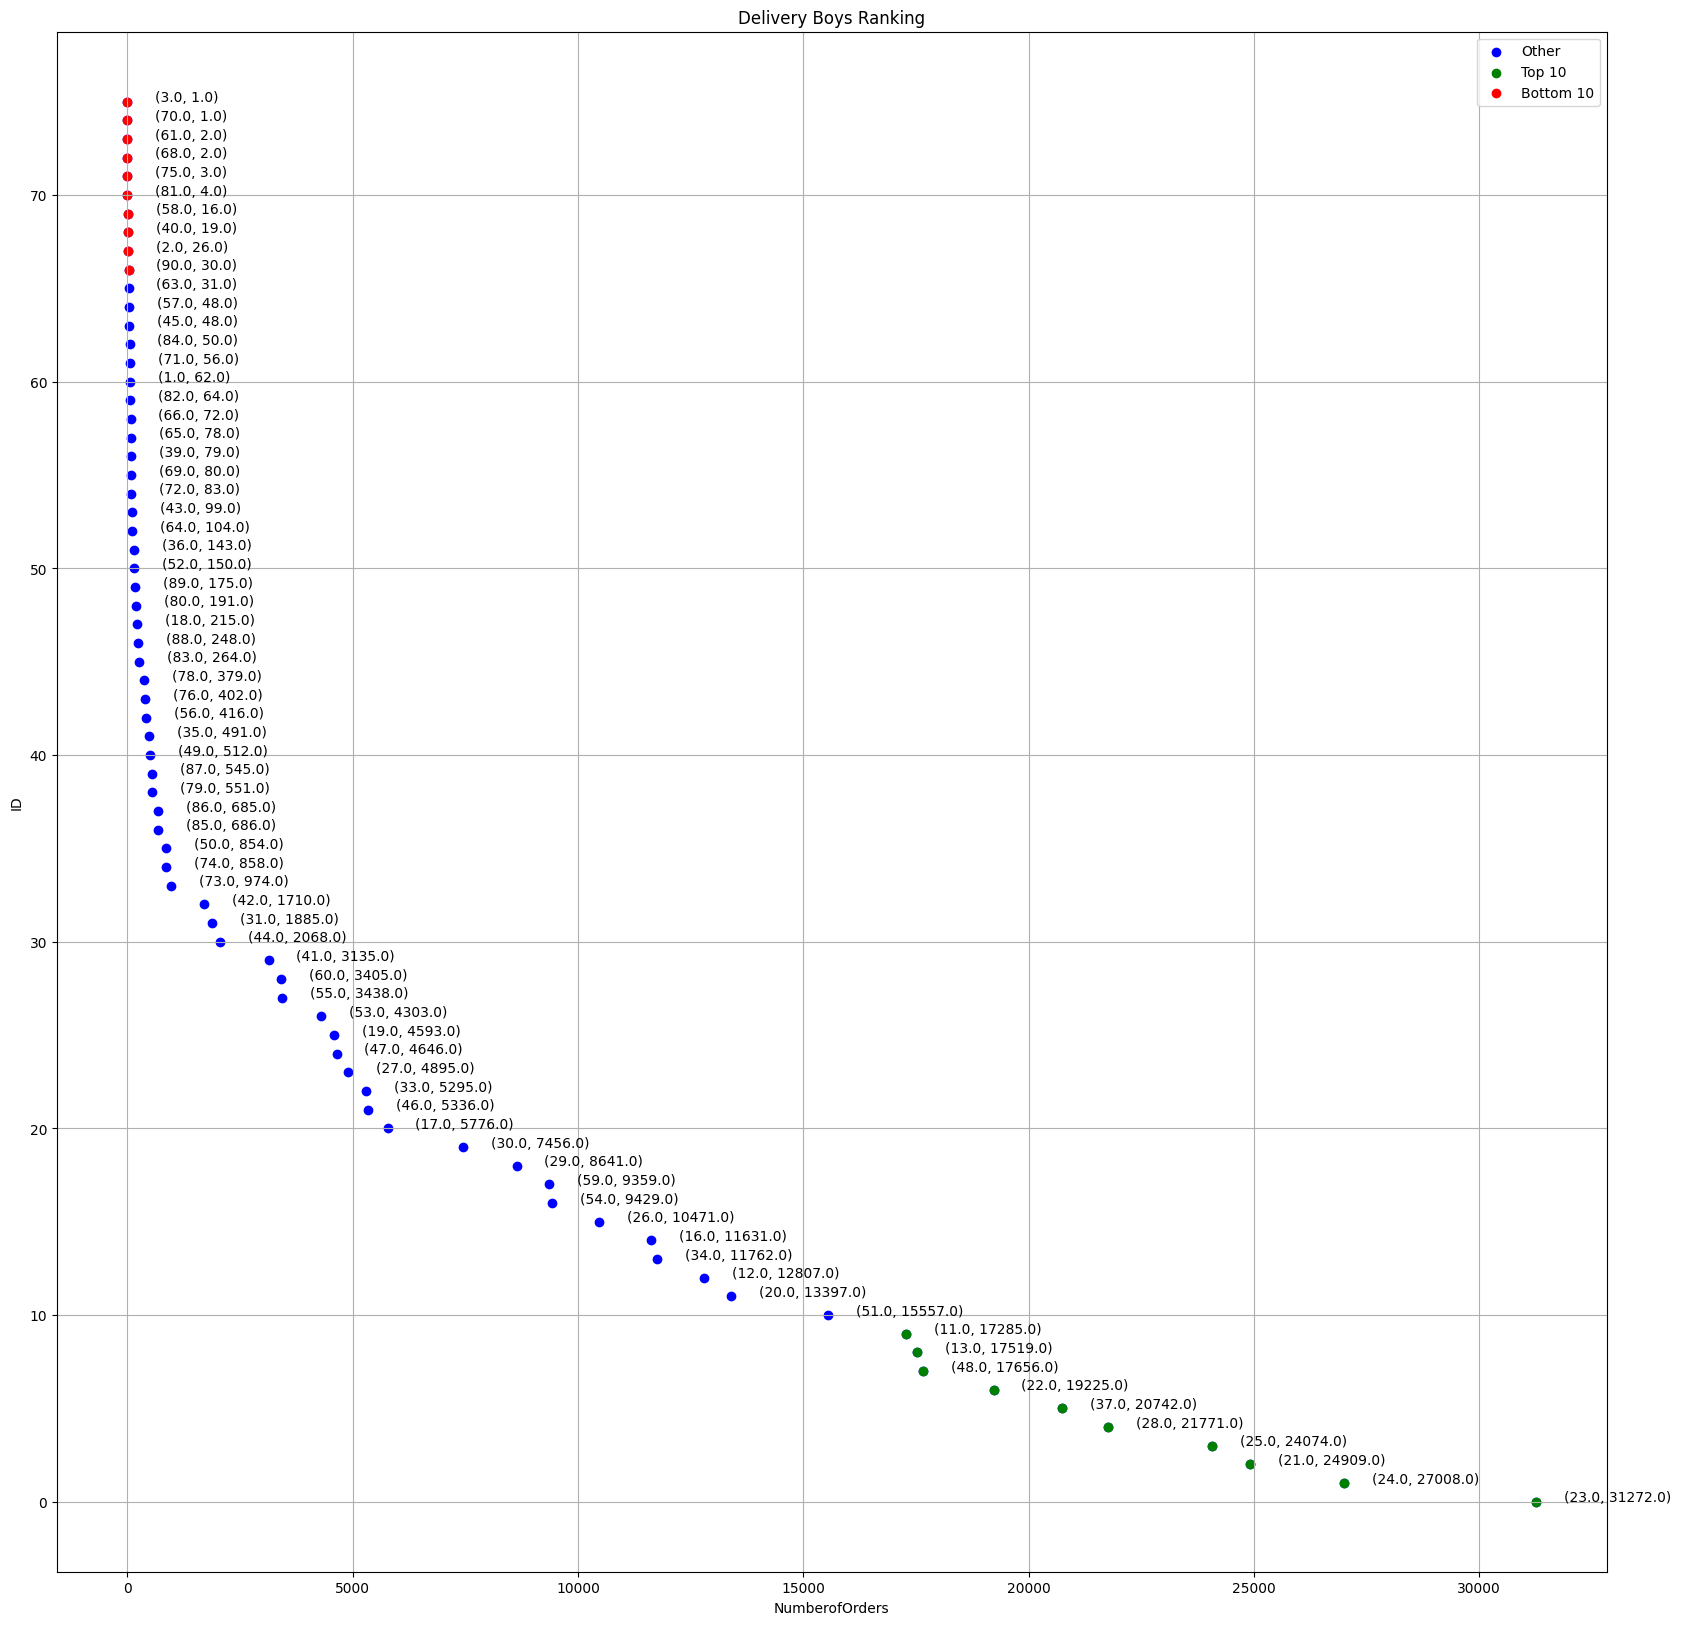

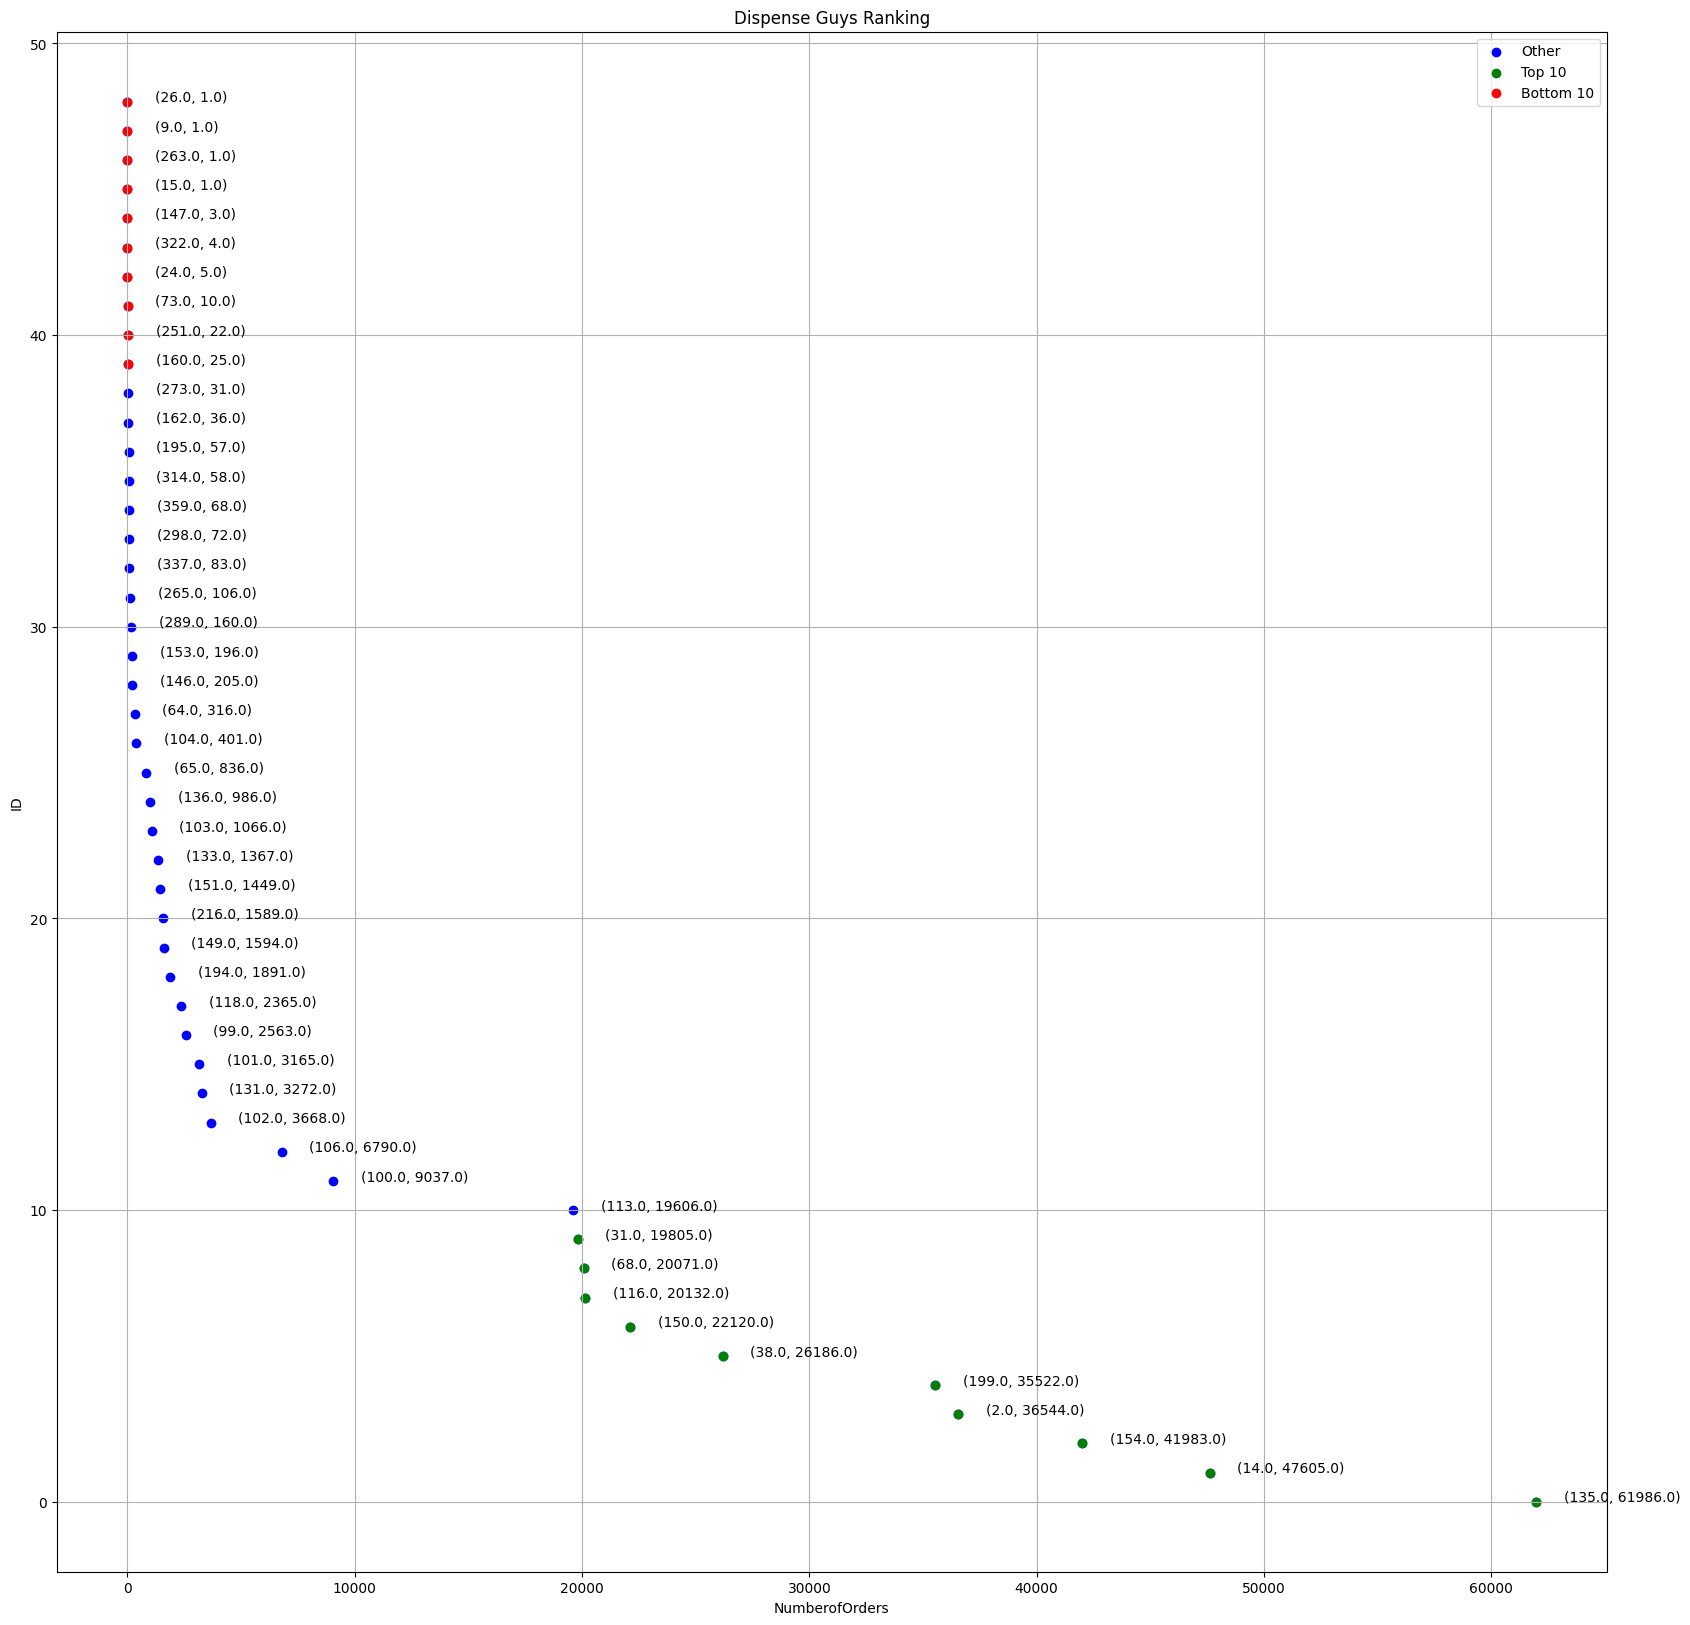

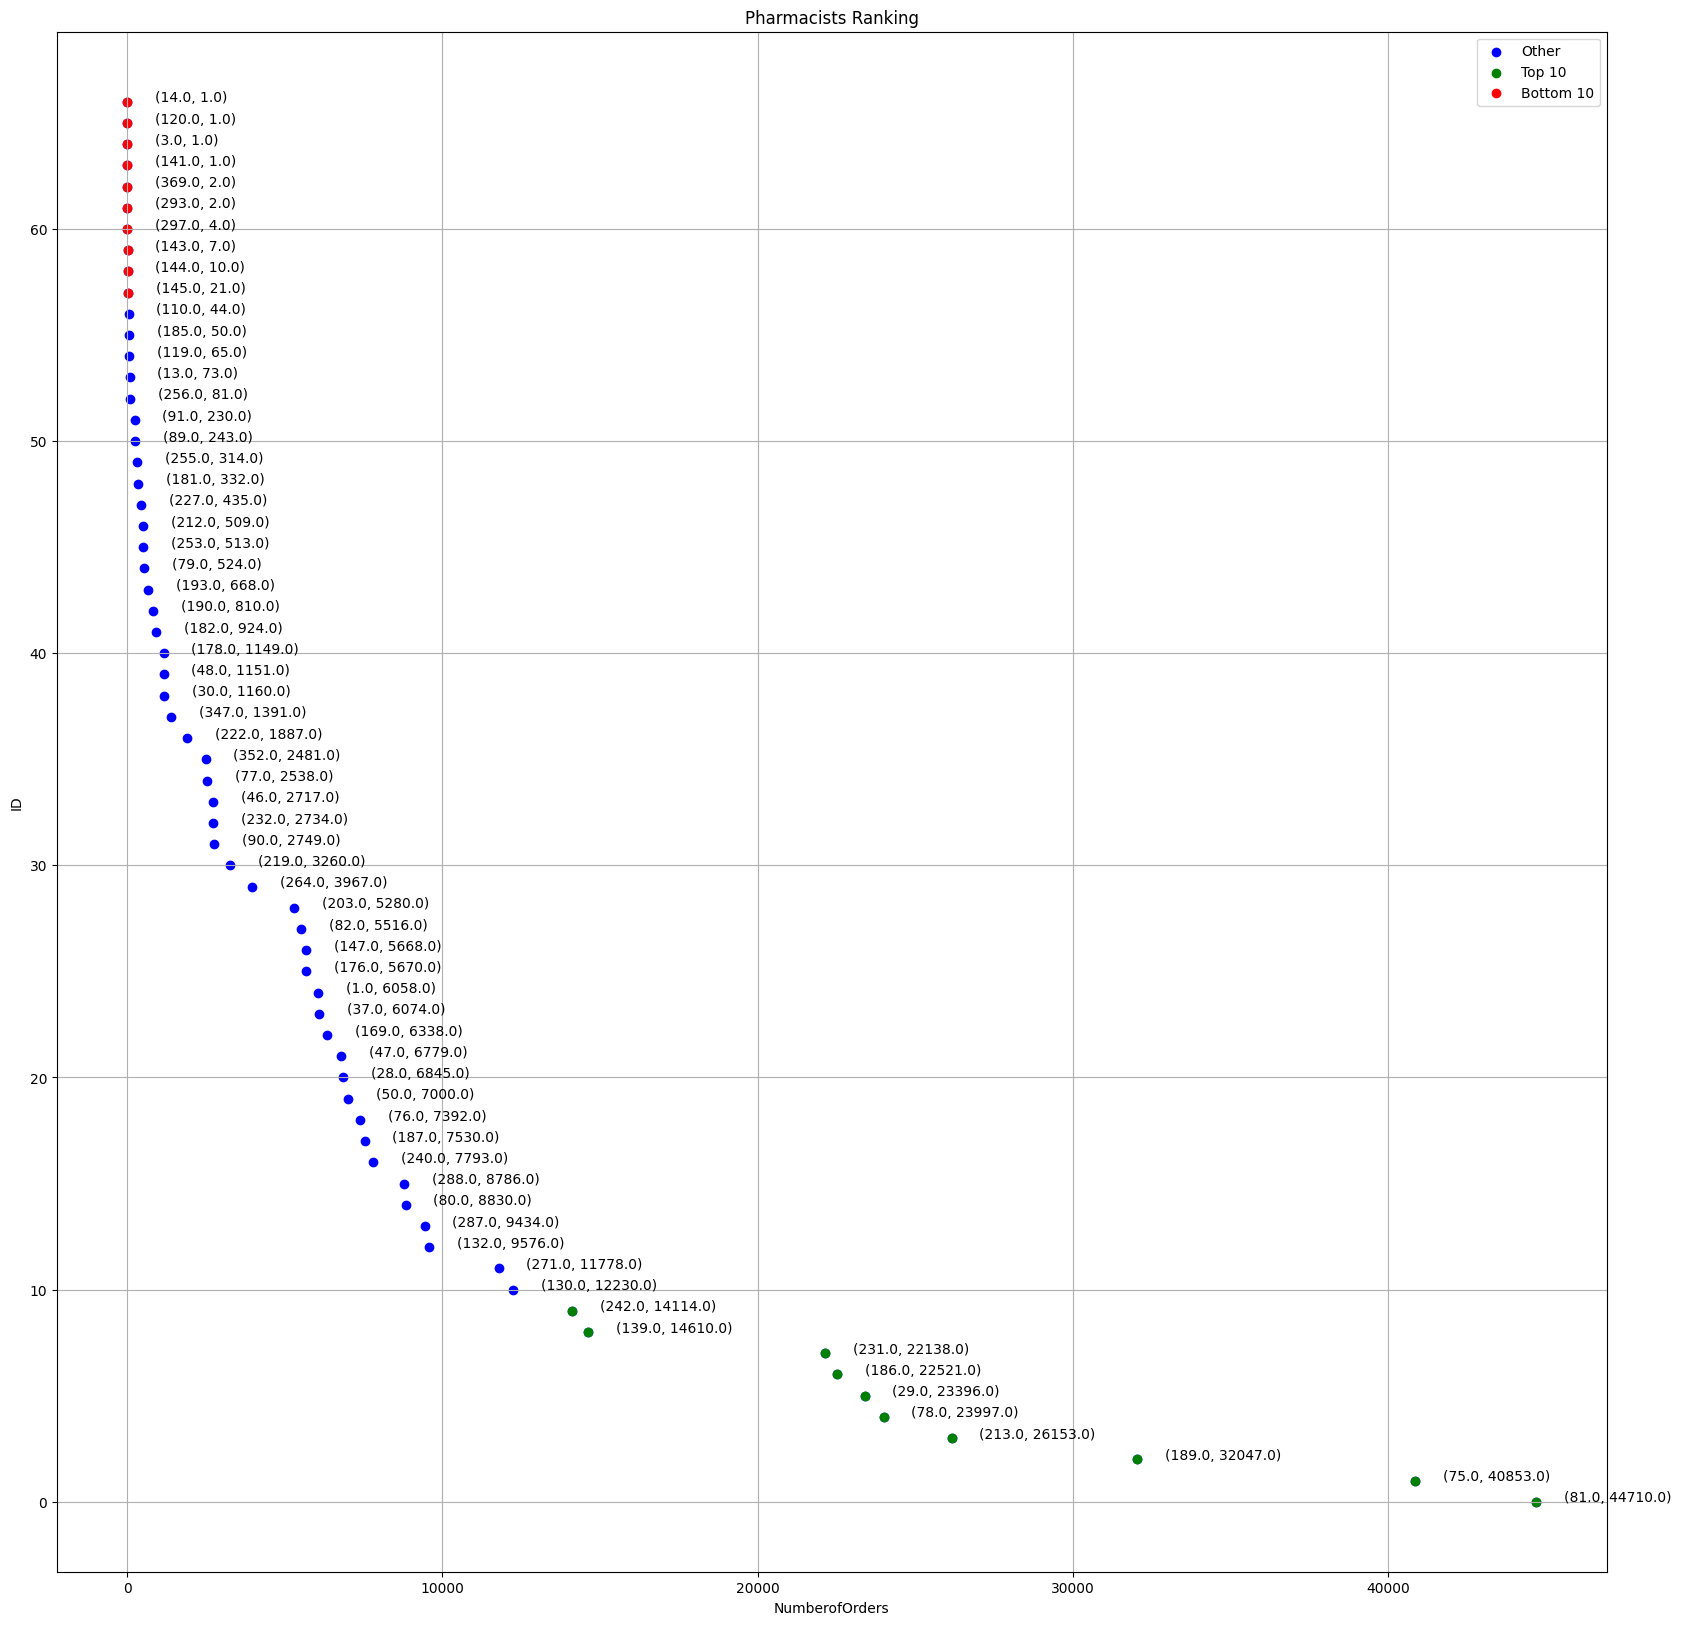

In [13]:
# create_scatter_plot(delivery_boy_rank, top10deliveryboy, bottom10deliveryboy, "Delivery Boys Ranking")
# create_scatter_plot(dispense_guy_rank, top10dispenseguy, bottom10dispenseguy, "Dispense Guys Ranking")
# create_scatter_plot(pharmacist_rank, top10pharmacist, bottom10pharmacist, "Pharmacists Ranking")

# Monthly Analysis

In [23]:
# year = 2023
# month = 9

# month_data = data[(data['order_date'].dt.year == year) & (data['order_date'].dt.month == month)]

# Monthly Delivery Boy Analysis

In [24]:
# delivery_boy_rank_month = month_data["delivery_boy_id"].value_counts().reset_index()
# delivery_boy_rank_month.columns = ["delivery_boy_id", "NumberofOrders"]
# top10deliveryboy_month = delivery_boy_rank_month.head(10)
# bottom10deliveryboy_month = delivery_boy_rank_month.tail(10)
# delivery_boy_rank_month_quartile=delivery_boy_rank_month.sort_values('NumberofOrders', ascending=False)
# delivery_boy_rank_month_quartile['Mix']=delivery_boy_rank_month_quartile['NumberofOrders']*100/delivery_boy_rank_month_quartile['NumberofOrders'].sum()
# delivery_boy_rank_month_quartile['CumuSum']=delivery_boy_rank_month_quartile['Mix'].cumsum()
# delivery_boy_rank_month_quartile['Tag']=0
# delivery_boy_rank_month_quartile.loc[delivery_boy_rank_month_quartile['CumuSum']<=25,"Tag"]='TopDeliveryBoys'
# delivery_boy_rank_month_quartile.loc[(delivery_boy_rank_month_quartile['CumuSum']>25) & (delivery_boy_rank_month_quartile['CumuSum']<=50),"Tag"]='FastMovingDeliveryBoys'
# delivery_boy_rank_month_quartile.loc[(delivery_boy_rank_month_quartile['CumuSum']>50) & (delivery_boy_rank_month_quartile['CumuSum']<=75),"Tag"]='SlowMovingDeliveryBoys'
# delivery_boy_rank_month_quartile.loc[(delivery_boy_rank_month_quartile['CumuSum']>75) & (delivery_boy_rank_month_quartile['CumuSum']<=101),"Tag"]='NonMovingDeliveryBoys'
# delivery_boy_rank_month_quartile['Tag'].value_counts()

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9812\1096748970.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TopDeliveryBoys' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  delivery_boy_rank_month_quartile.loc[delivery_boy_rank_month_quartile['CumuSum']<=25,"Tag"]='TopDeliveryBoys'


Tag
NonMovingDeliveryBoys     18
SlowMovingDeliveryBoys     6
FastMovingDeliveryBoys     3
TopDeliveryBoys            2
Name: count, dtype: int64

In [25]:
# typemain = "TopDeliveryBoys"
# delivery_boy_rank_month_quartile[delivery_boy_rank_month_quartile["Tag"] == typemain].reset_index()[["delivery_boy_id", "NumberofOrders"]]

,delivery_boy_id,NumberofOrders
0,23.0,310
1,48.0,310


# Monthly Dispense Guy Analysis

In [26]:
# dispense_guy_rank_month = month_data["dispense_guy_id"].value_counts().reset_index()
# dispense_guy_rank_month.columns = ["dispense_guy_id", "NumberofOrders"]
# top10dispenseguy_month = dispense_guy_rank_month.head(10)
# bottom10dispenseguy_month = dispense_guy_rank_month.tail(10)
# dispense_guy_rank_month_quartile=dispense_guy_rank_month.sort_values('NumberofOrders', ascending=False)
# dispense_guy_rank_month_quartile['Mix']=dispense_guy_rank_month_quartile['NumberofOrders']*100/dispense_guy_rank_month_quartile['NumberofOrders'].sum()
# dispense_guy_rank_month_quartile['CumuSum']=dispense_guy_rank_month_quartile['Mix'].cumsum()
# dispense_guy_rank_month_quartile['Tag']=0
# dispense_guy_rank_month_quartile.loc[dispense_guy_rank_month_quartile['CumuSum']<=25,"Tag"]='TopDispenseGuys'
# dispense_guy_rank_month_quartile.loc[(dispense_guy_rank_month_quartile['CumuSum']>25) & (dispense_guy_rank_month_quartile['CumuSum']<=50),"Tag"]='FastMovingDispenseGuys'
# dispense_guy_rank_month_quartile.loc[(dispense_guy_rank_month_quartile['CumuSum']>50) & (dispense_guy_rank_month_quartile['CumuSum']<=75),"Tag"]='SlowMovingDispenseGuys'
# dispense_guy_rank_month_quartile.loc[(dispense_guy_rank_month_quartile['CumuSum']>75) & (dispense_guy_rank_month_quartile['CumuSum']<=101),"Tag"]='NonMovingDispenseGuys'
# dispense_guy_rank_month_quartile['Tag'].value_counts()

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9812\1316671462.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TopDispenseGuys' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dispense_guy_rank_month_quartile.loc[dispense_guy_rank_month_quartile['CumuSum']<=25,"Tag"]='TopDispenseGuys'


Tag
NonMovingDispenseGuys     13
SlowMovingDispenseGuys     2
TopDispenseGuys            1
FastMovingDispenseGuys     1
Name: count, dtype: int64

In [27]:
# typemain = "TopDispenseGuys"
# dispense_guy_rank_month_quartile[dispense_guy_rank_month_quartile["Tag"] == typemain].reset_index()[["dispense_guy_id", "NumberofOrders"]]

,dispense_guy_id,NumberofOrders
0,135.0,674


# Monthly Pharmacist Analysis

In [32]:
# pharmacist_rank_month = month_data["pharmacist_id"].value_counts().reset_index()
# pharmacist_rank_month.columns = ["pharmacist_id", "NumberofOrders"]
# top10pharmacist_month = pharmacist_rank_month.head(10)
# bottom10pharmacist_month = pharmacist_rank_month.tail(10)
# pharmacist_rank_month_quartile=pharmacist_rank_month.sort_values('NumberofOrders', ascending=False)
# pharmacist_rank_month_quartile['Mix']=pharmacist_rank_month_quartile['NumberofOrders']*100/pharmacist_rank_month_quartile['NumberofOrders'].sum()
# pharmacist_rank_month_quartile['CumuSum']=pharmacist_rank_month_quartile['Mix'].cumsum()
# pharmacist_rank_month_quartile['Tag']=0
# pharmacist_rank_month_quartile.loc[pharmacist_rank_month_quartile['CumuSum']<=25,"Tag"]='TopPharmacists'
# pharmacist_rank_month_quartile.loc[(pharmacist_rank_month_quartile['CumuSum']>25) & (pharmacist_rank_month_quartile['CumuSum']<=50),"Tag"]='FastMovingPharmacists'
# pharmacist_rank_month_quartile.loc[(pharmacist_rank_month_quartile['CumuSum']>50) & (pharmacist_rank_month_quartile['CumuSum']<=75),"Tag"]='SlowMovingPharmacists'
# pharmacist_rank_month_quartile.loc[(pharmacist_rank_month_quartile['CumuSum']>75) & (pharmacist_rank_month_quartile['CumuSum']<=101),"Tag"]='NonMovingPharmacists'
# pharmacist_rank_month_quartile['Tag'].value_counts()

C:\Users\CEPL\AppData\Local\Temp\ipykernel_9812\1058628228.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TopPharmacists' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pharmacist_rank_month_quartile.loc[pharmacist_rank_month_quartile['CumuSum']<=25,"Tag"]='TopPharmacists'


Tag
NonMovingPharmacists     13
SlowMovingPharmacists     2
TopPharmacists            1
FastMovingPharmacists     1
Name: count, dtype: int64

In [33]:
# typemain = "TopPharmacists"
# pharmacist_rank_month_quartile[pharmacist_rank_month_quartile["Tag"] == typemain].reset_index()[["pharmacist_id", "NumberofOrders"]]

,pharmacist_id,NumberofOrders
0,189.0,747


In [30]:
# top10deliveryboy_month

,delivery_boy_id,NumberofOrders
0,23.0,310
1,48.0,310
2,59.0,278
3,25.0,239
4,51.0,218
5,87.0,192
6,34.0,178
7,86.0,160
8,85.0,151
9,13.0,141


# Monthly Visualization

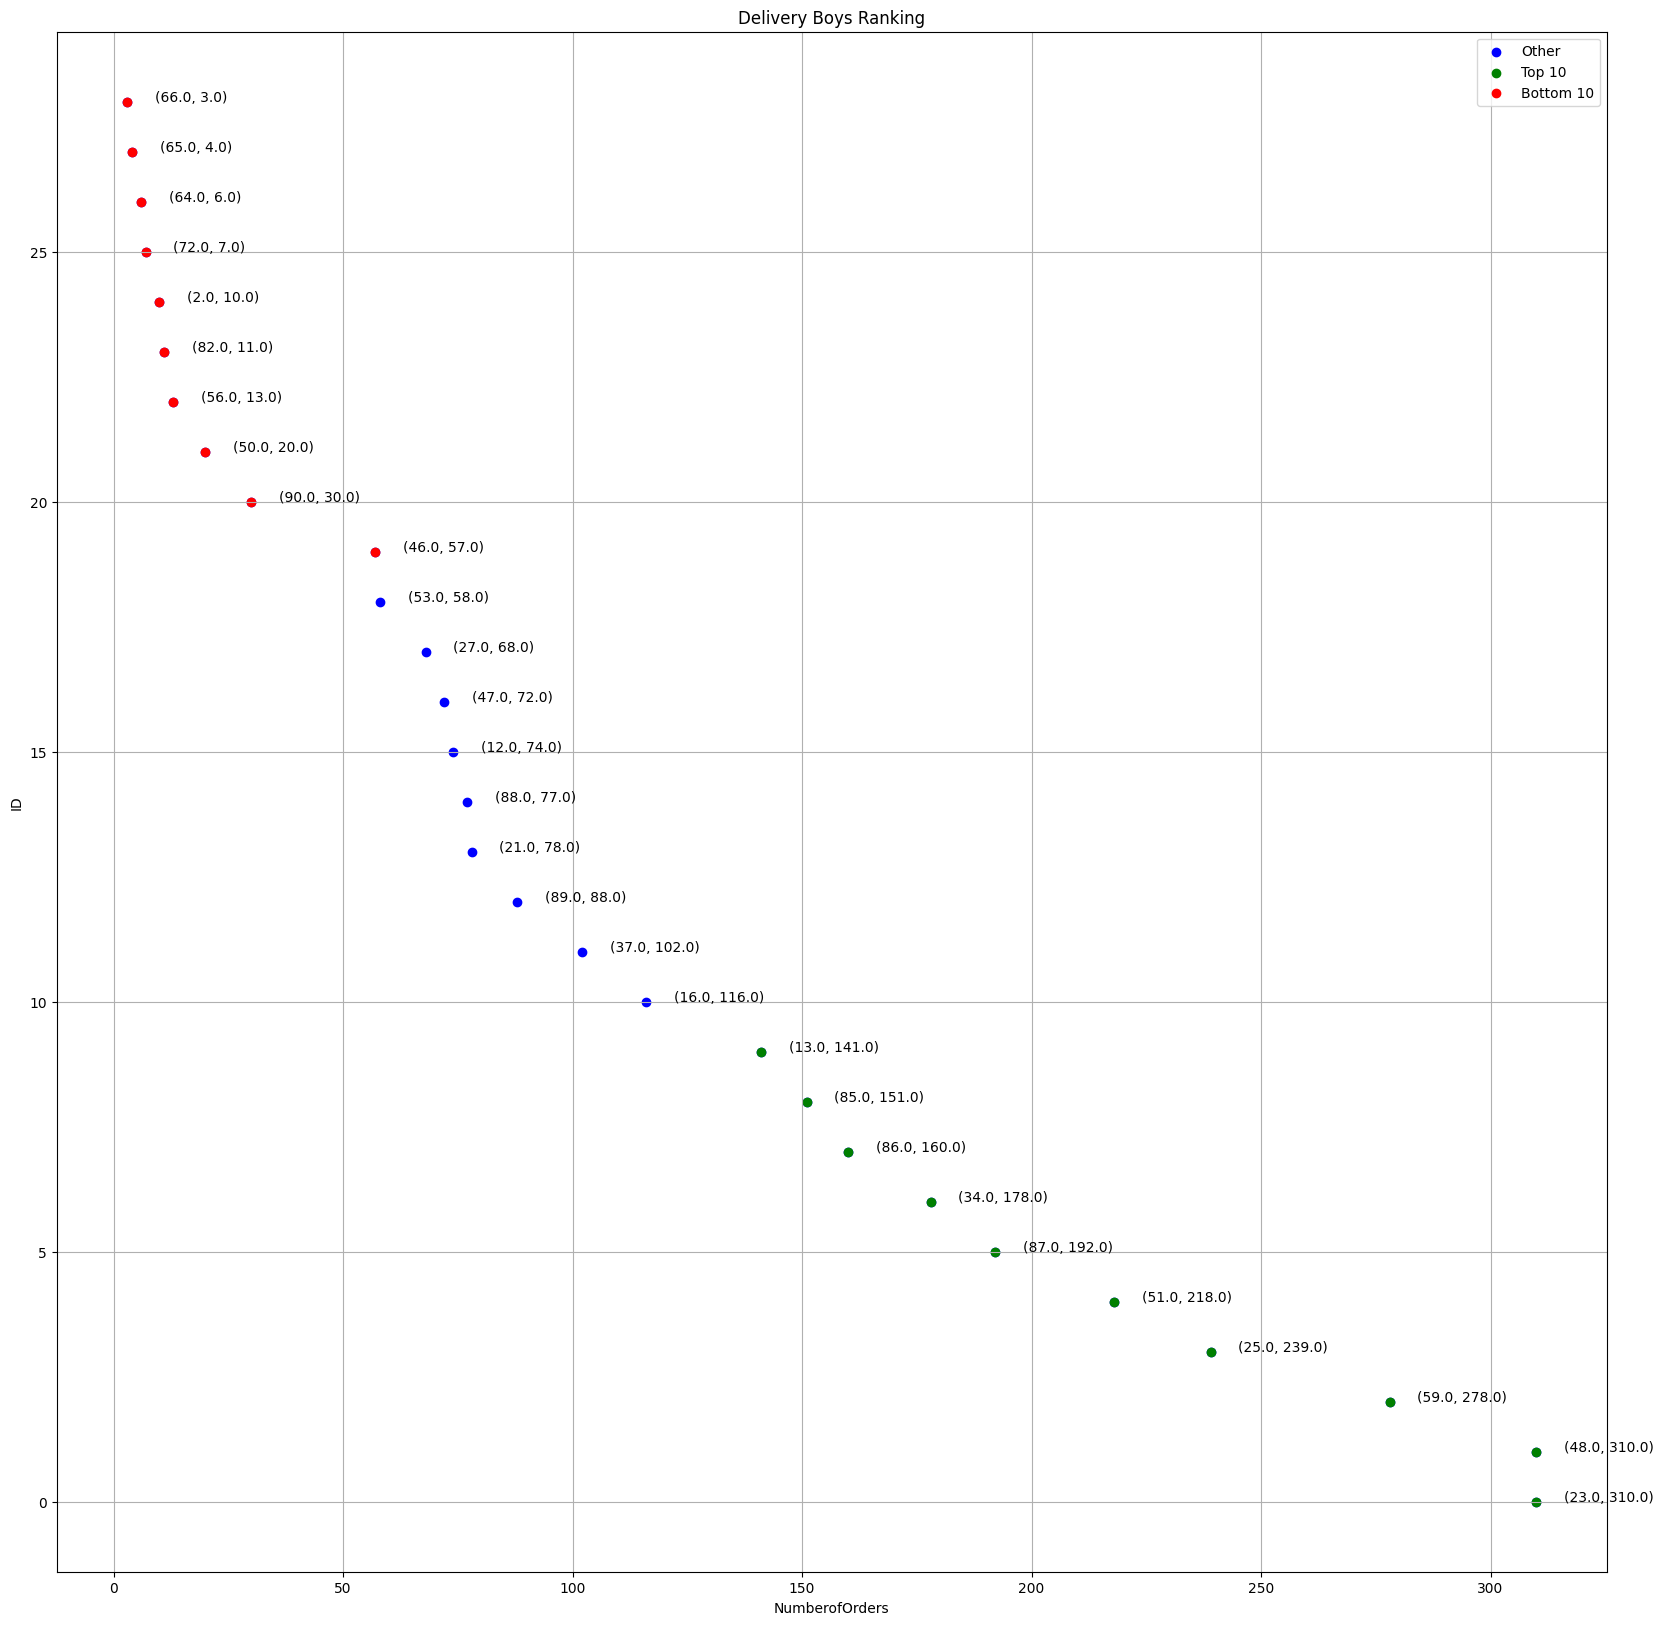

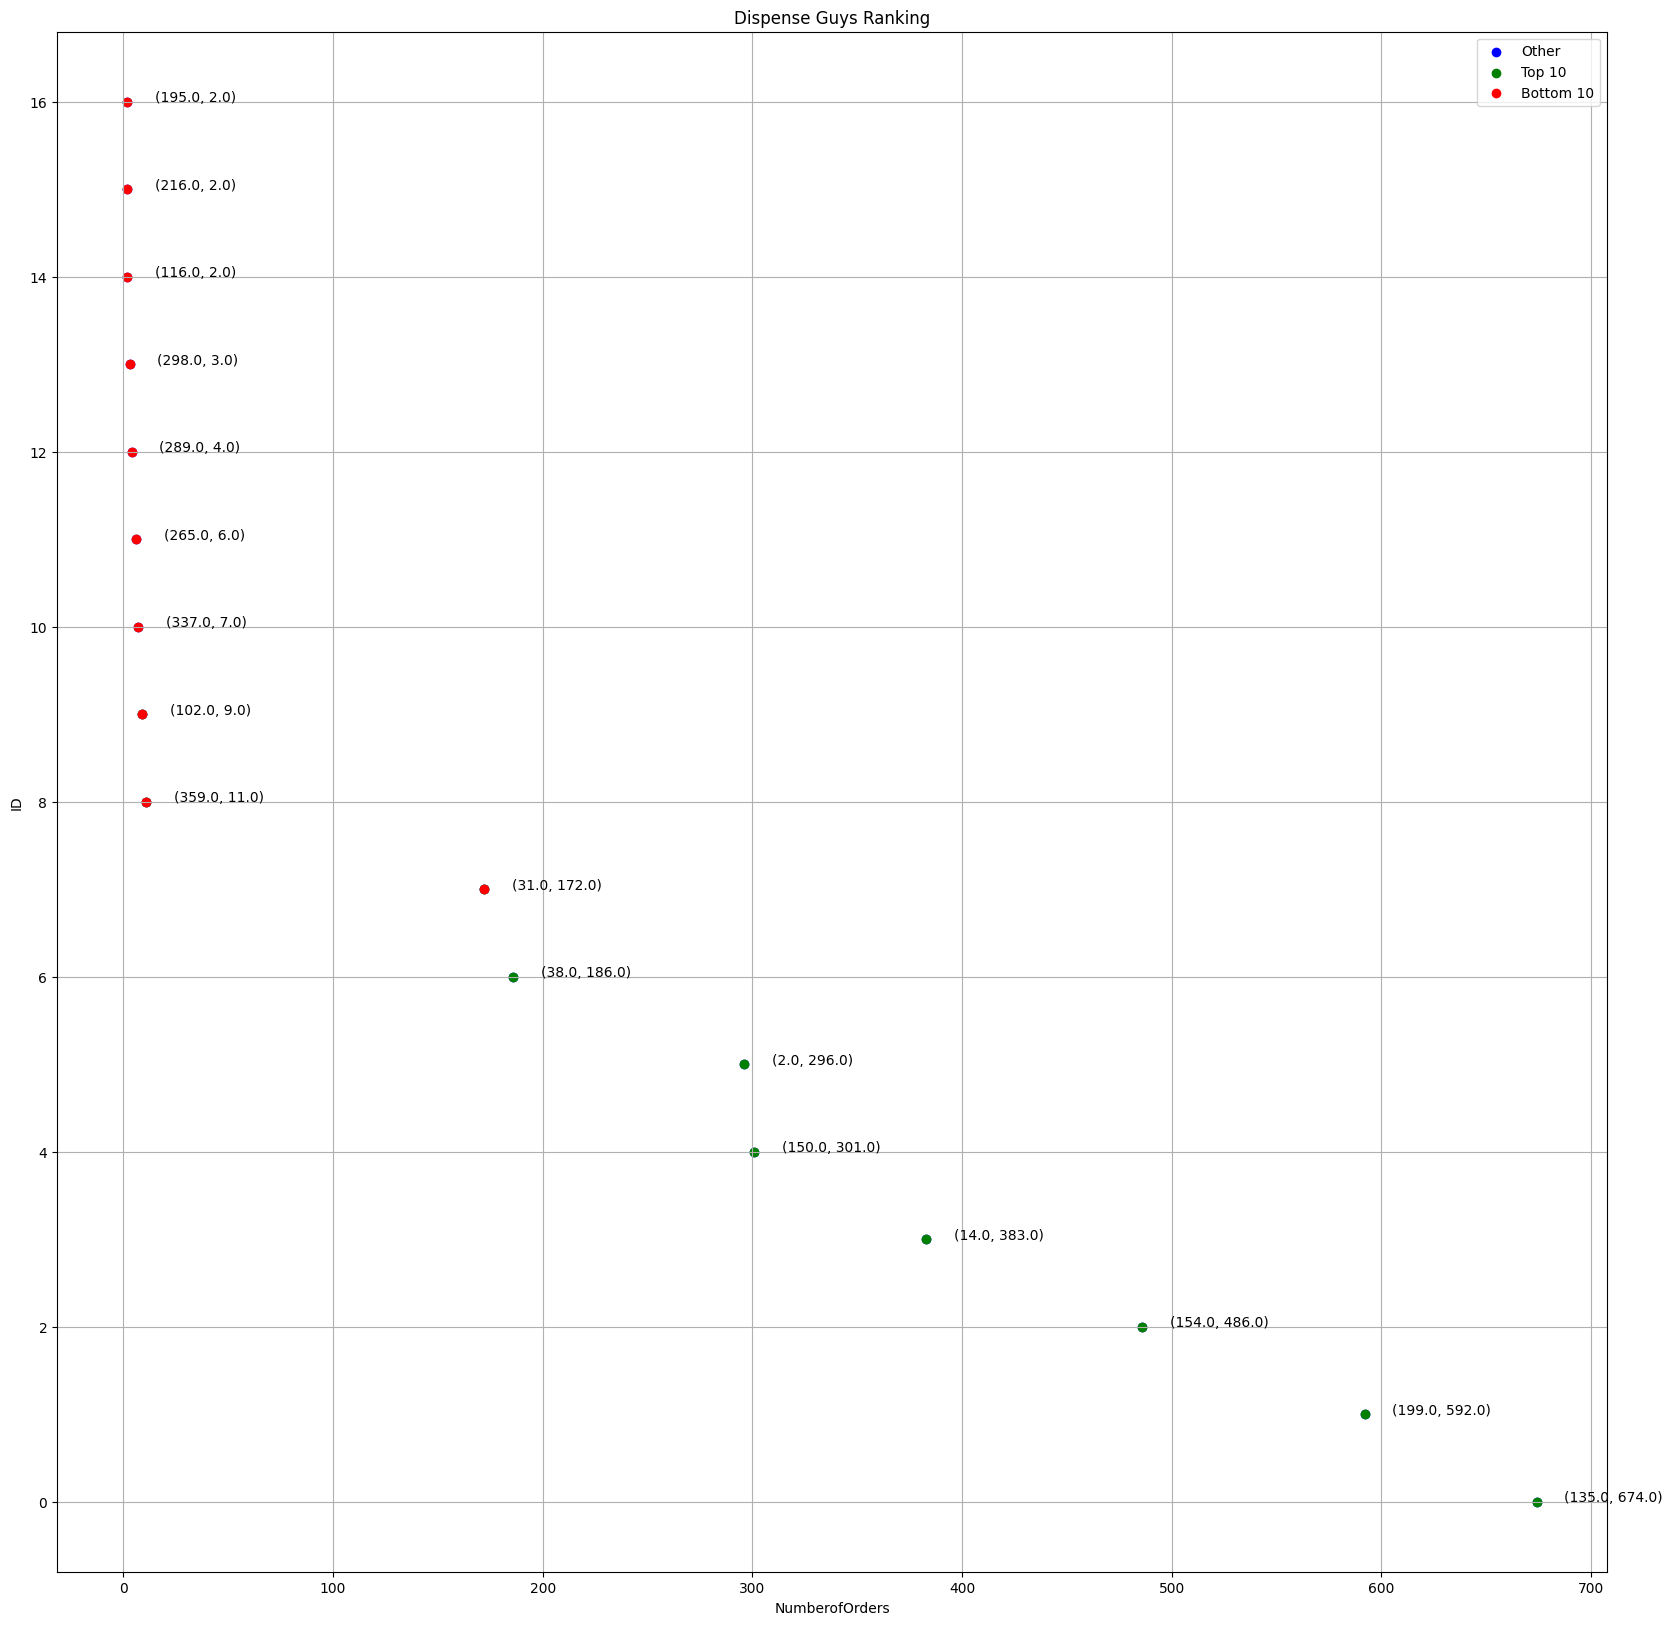

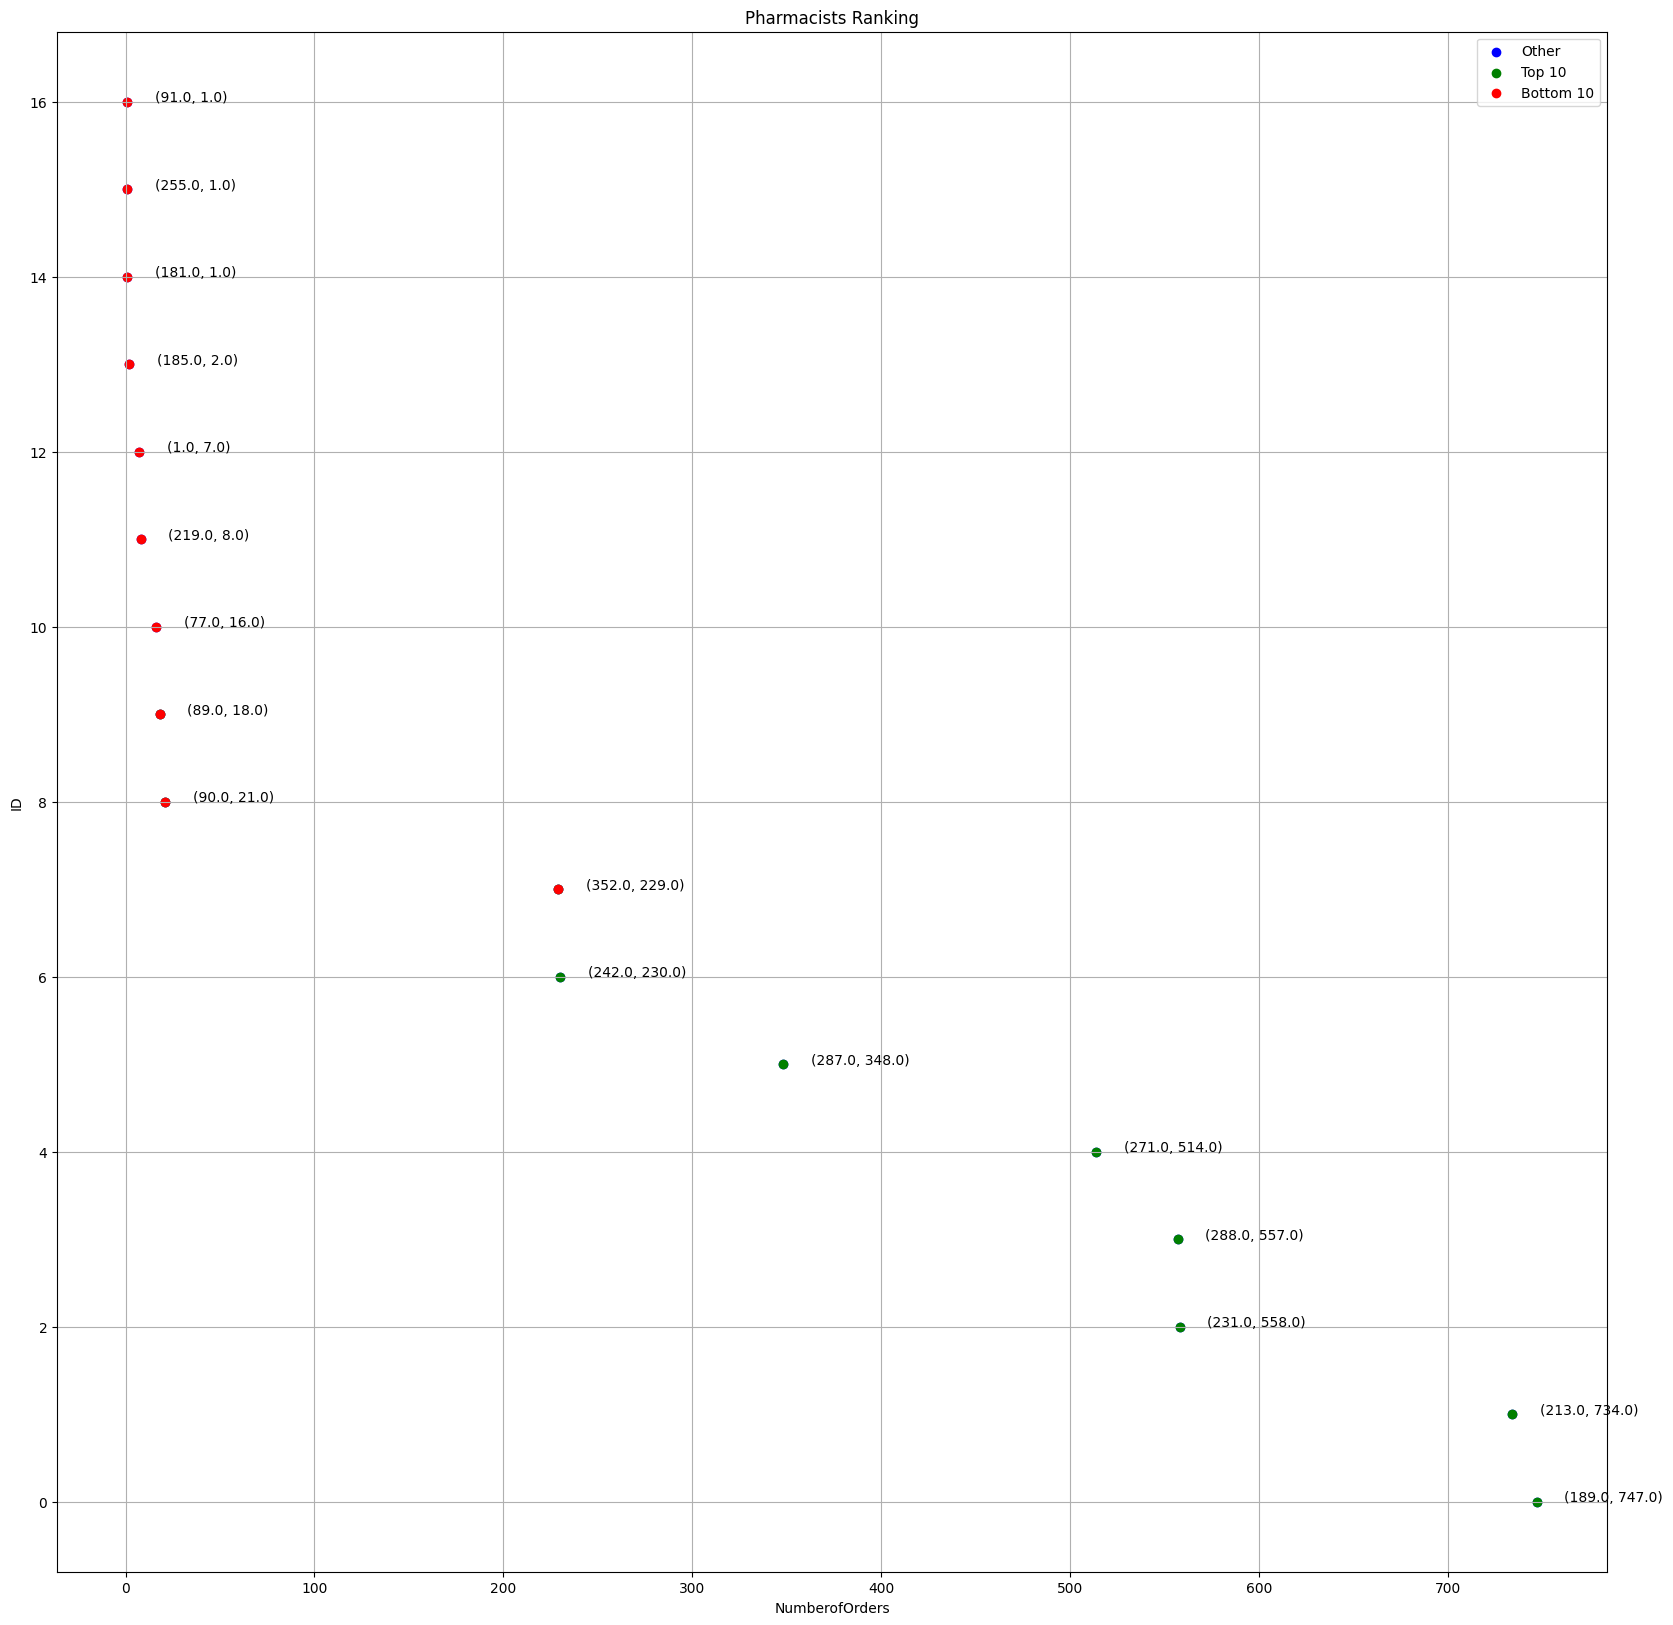

In [31]:
# create_scatter_plot(delivery_boy_rank_month, top10deliveryboy_month, bottom10deliveryboy_month, "Delivery Boys Ranking")
# create_scatter_plot(dispense_guy_rank_month, top10dispenseguy_month, bottom10dispenseguy_month, "Dispense Guys Ranking")
# create_scatter_plot(pharmacist_rank_month, top10pharmacist_month, bottom10pharmacist_month, "Pharmacists Ranking")